In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, roc_auc_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer

In [39]:
df= pd.read_csv(r'C:\Users\maths\Downloads\water_pollution_disease.csv')

In [40]:
df['Clean_Water']=df['Access to Clean Water (% of Population)']*df['Sanitation Coverage (% of Population)']
df['Pollution_Burden']=(df['Contaminant Level (ppm)']+ df['Bacteria Count (CFU/mL)'])/df['pH Level']
df['Composite_Risk_Score']= df['Pollution_Burden']- df["Clean_Water"]

In [41]:
df.head()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²),Clean_Water,Pollution_Burden,Composite_Risk_Score
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,57057,96.92,84.61,63.23,2800,4.94,593,2124.5280,470.514045,-1654.013955
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,17220,84.73,73.37,29.12,1572,16.93,234,2607.4048,271.331633,-2336.073167
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,86022,58.37,72.86,93.56,2074,21.73,57,3301.7324,362.401244,-2939.331156
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,31166,39.07,71.07,94.25,937,3.79,555,5422.2025,564.368107,-4857.834393
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,25661,23.03,55.55,69.23,2295,31.44,414,2533.8180,512.514706,-2021.303294


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)                      3000 

In [43]:
df.fillna(SimpleImputer(strategy=KNNImputer))

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²),Clean_Water,Pollution_Burden,Composite_Risk_Score
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,57057,96.92,84.61,63.23,2800,4.94,593,2124.5280,470.514045,-1654.013955
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,17220,84.73,73.37,29.12,1572,16.93,234,2607.4048,271.331633,-2336.073167
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,86022,58.37,72.86,93.56,2074,21.73,57,3301.7324,362.401244,-2939.331156
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,31166,39.07,71.07,94.25,937,3.79,555,5422.2025,564.368107,-4857.834393
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,25661,23.03,55.55,69.23,2295,31.44,414,2533.8180,512.514706,-2021.303294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Nigeria,East,2002,Tap,2.82,7.40,4.43,9.69,37.58,18.52,...,21255,75.34,15.22,53.06,264,31.64,882,1928.2004,48.894595,-1879.305805
2996,Nigeria,North,2019,Lake,8.13,8.33,4.77,7.62,38.05,16.98,...,79148,6.91,22.89,78.45,2699,33.21,67,6410.9340,458.358944,-5952.575056
2997,USA,South,2009,Pond,1.18,6.76,4.75,7.07,36.13,7.99,...,48569,86.17,85.89,47.38,1052,11.57,643,3795.6118,213.192308,-3582.419492
2998,Pakistan,South,2009,Pond,7.56,6.12,3.49,8.93,25.30,19.86,...,49099,20.50,20.78,23.34,369,14.69,643,1826.5884,478.196078,-1348.392322


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        3000 non-null   object 
 1   Region                                         3000 non-null   object 
 2   Year                                           3000 non-null   int64  
 3   Water Source Type                              3000 non-null   object 
 4   Contaminant Level (ppm)                        3000 non-null   float64
 5   pH Level                                       3000 non-null   float64
 6   Turbidity (NTU)                                3000 non-null   float64
 7   Dissolved Oxygen (mg/L)                        3000 non-null   float64
 8   Nitrate Level (mg/L)                           3000 non-null   float64
 9   Lead Concentration (µg/L)                      3000 

In [45]:
# Feature engineering
df['Clean_Water'] = df['Access to Clean Water (% of Population)'] * df['Sanitation Coverage (% of Population)']
df['Pollution_Burden'] = (df['Contaminant Level (ppm)'] + df['Bacteria Count (CFU/mL)']) / df['pH Level']
df['Composite_Risk_Score'] = df['Pollution_Burden'] - df['Clean_Water']

# Segment data into 3 predefined classes
df['Income_Sanitation_Class'] = np.select(
    [
        (df['GDP per Capita (USD)'] < df['GDP per Capita (USD)'].quantile(0.33)) & (df['Sanitation Coverage (% of Population)'] < df['Sanitation Coverage (% of Population)'].quantile(0.33)),
        (df['GDP per Capita (USD)'].between(df['GDP per Capita (USD)'].quantile(0.33), df['GDP per Capita (USD)'].quantile(0.66))) & (df['Sanitation Coverage (% of Population)'].between(df['Sanitation Coverage (% of Population)'].quantile(0.33), df['Sanitation Coverage (% of Population)'].quantile(0.66))),
        (df['GDP per Capita (USD)'] > df['GDP per Capita (USD)'].quantile(0.66)) & (df['Sanitation Coverage (% of Population)'] > df['Sanitation Coverage (% of Population)'].quantile(0.66))
    ],
    ['low_income_low_sanitation', 'mid_income_mixed_quality', 'high_income_industrial_pollution'],
    default='unknown'
)

# Apply VIF and correlation-based feature selection
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [calculate_vif([features].values, i) for i in range(len(features))]
    return vif_data

def correlation_matrix(df, features):
    corr = df[features].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

In [46]:
print(df.columns)

Index(['Country', 'Region', 'Year', 'Water Source Type',
       'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)',
       'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)',
       'Water Treatment Method', 'Access to Clean Water (% of Population)',
       'Diarrheal Cases per 100,000 people',
       'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people',
       'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)',
       'Healthcare Access Index (0-100)', 'Urbanization Rate (%)',
       'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)',
       'Temperature (°C)', 'Population Density (people per km²)',
       'Clean_Water', 'Pollution_Burden', 'Composite_Risk_Score',
       'Income_Sanitation_Class'],
      dtype='object')


Model Building

In [47]:
df['Sanitation Coverage (% of Population)']= df['Sanitation Coverage (% of Population)']+ 0.2*df['Sanitation Coverage (% of Population)']
df['GDP per Capita (USD)'] = df['GDP per Capita (USD)']+ 0.15*df['GDP per Capita (USD)']
df['pH Level']= df['pH Level']-0.1*df['pH Level']

In [48]:
# Define features and target
target_column = 'Total_Disease_Incidence'
numerical_features = ['Year', 'Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)', 'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)', 'Access to Clean Water (% of Population)', 'Diarrheal Cases per 100,000 people', 'Cholera Cases per 100,000 people', 'Typhoid Cases per 100,000 people', 'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)', 'Healthcare Access Index (0-100)', 'Urbanization Rate (%)', 'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)', 'Temperature (°C)', 'Population Density (people per km²)', 'Clean_Water', 'Pollution_Burden', 'Composite_Risk_Score']
categorical_features = ['Country', 'Region', 'Water Source Type', 'Water Treatment Method']

X = df[numerical_features + categorical_features]
y = df[target_column]

# Preprocessing pipeline for numerical features
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Label encode categorical features
for col in categorical_features:
    X[col] = X[col].astype(str)  # Ensure string type
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_features)
])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
# Train-test split

KeyError: 'Total_Disease_Incidence'

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 178.9793404921696
R² Score: 0.9920068324827205


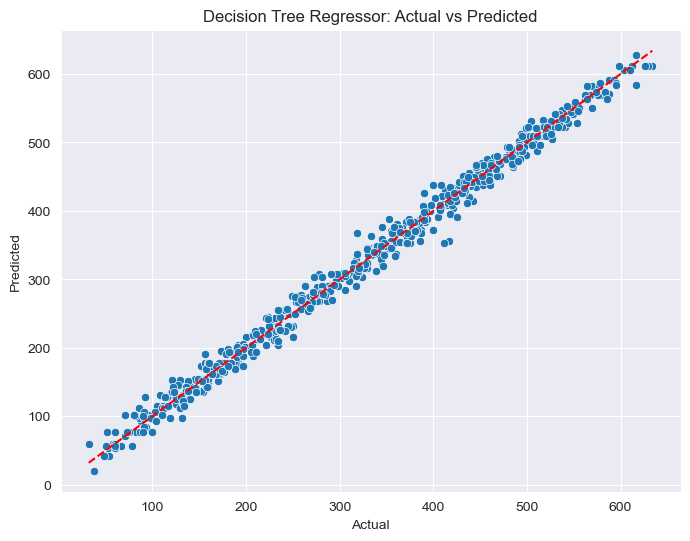

In [23]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(dt, param_grid=params, cv=5)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45 degree line
plt.show()

Naive Bayes classifier for predicting high_risk_status (binary level based on disease incidence > 75th percentile)

ValueError: multi_class must be in ('ovo', 'ovr')

In [26]:
# Define target columns for individual diseases
disease_targets = ['Cholera Cases per 100,000 people', 'Diarrheal Cases per 100,000 people', 'Typhoid Cases per 100,000 people']

for disease in disease_targets:
    y = df[disease]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # Decision Tree Regressor
    dt = DecisionTreeRegressor(random_state=42)

    params = {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid = GridSearchCV(dt, param_grid=params, cv=5)
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)
    print(f"Results for {disease}:")
    print("Best Parameters:", grid.best_params_)
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Decision Tree Regressor: Actual vs Predicted for {disease}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45 degree line
    plt.show()

KeyboardInterrupt: 

Redefining split block to predict individual disease cases (cholera, diarrhea, typhoid)


In [ ]:
# Simulate scenario
df['Sanitation Coverage (% of Population)'] = df['Sanitation Coverage (% of Population)'] * 1.2
df['GDP per Capita (USD)'] = df['GDP per Capita (USD)'] * 1.15
df['Water Treatment Method'] = df['Water Treatment Method'] * 0.9

# Reprocess data
X = df[numerical_features + categorical_features]
for col in categorical_features:
    X[col] = X[col].astype(str)  # Ensure string type
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_processed = preprocessor.transform(X)

# Re-evaluate models with new data
# Decision Tree Regressor for Total Disease Incidence
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
print("Updated Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Updated R² Score:", r2_score(y_test, y_pred))

# Naive Bayes Classifier for High Risk Status
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print("Updated ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("Updated Precision:", precision_score(y_test, y_pred))
print("Updated Recall:", recall_score(y_test, y_pred))

# Decision Tree Regressor for Individual Disease Cases
for disease in disease_targets:
    y = df[disease]
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print(f"Updated Results for {disease}:")
    print("Updated Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Updated R² Score:", r2_score(y_test, y_pred))